# PHYS 1321: Computational Methods in Physics
## Problem Set 7
## Due 2016-10-14 @ 23:59 EDT

* Complete the following problems.
* Fork and clone the GitHub repository for this assignment
* Complete your own version of this iPython Notebook and commit and create a pull request to submit.

Your writeup in this iPython Notebook should include:

1.  Answers to specific questions in the problem.
2.  The parameters used to generate your results.
3.  The text output of your code.
4.  Images of all plots your code produces.

### Problem 1: Comments, Code, and Reflection
Comment and compare your solution and your assigned classmate's solution to a problem from any of Problem Set 5-6.  Enter your comment on the GitHub Pull Request for your homework submission, or the Pull Request for your classmate's submission.

Your comment should either
  * identify something that can be improved in at least one of the solutions, explain why, and propose a solution.
  * identify some new method or approach you figured out from this exercise, and explain it.

The goal of this problem is for you to intellectually engage in someone else's code and also to reflect on your own code.  Your assignments follow:

------

In [1]:
from assign_reviewers import assign_reviewers
student_list_file = 'students.list'
students = np.genfromtxt(student_list_file, dtype='U')

# You could specifically look up your own GitHub username in this dict:
review = assign_reviewers(students, everyother=True, iteration=2)

In [2]:
# Or generate the table
# where we looping over the original student array to get consistent order
# (looking over the key, value pairs in reviews doesn't guarantee order.)
for s in students:
    print("%-10s -> %-10s" % (s, review[s]))

ErickBrindock -> REL95     
MiaRossi   -> Vynas     
NickCorrado -> tabachnick
noahkeemarks -> smb200    
Sconnors39 -> yuh60     
gea23      -> etd12     
gmcnamara  -> mike2755  
njw27      -> kvseeley  
yuh60      -> Sconnors39
tabachnick -> NickCorrado
nah91      -> natestodick
tmduddy    -> nwt5      
smb200     -> noahkeemarks
nwt5       -> tmduddy   
kvseeley   -> njw27     
mike2755   -> stephenhemmerle
REL95      -> ErickBrindock
stephenhemmerle -> gmcnamara 
etd12      -> gea23     
natestodick -> nah91     
Vynas      -> MiaRossi  


### Problem 2: Free Fall with Air Resistance
In this problem, you will write a function that uses the four integration methods demonstrated in the lecture demonstration to solve the one-dimensional projectile (free fall) problem with and without air resistance.

Consider a baseball thrown straight up in the air. The forces acting on the baseball are gravity, $\vec{F}_g = - m g \hat{j}$, and drag from air resistance with turbulent flow $\vec{F}_{D}=-\tfrac{1}{2}\rho v^2 C_d A \hat{v}$. The radius of the baseball is $r = 0.0366$ m, and $A = \pi r^2$. The mass is $m = 0.145$ kg, the drag coefficient is $C_d = 0.5$ (appropriate for a batted ball or pitched fastball), and the density of air is $\rho = 1.16$ kg/m$^3$ (appropriate for PNC Park at an elevation of 250 m).

a. Using the forces from gravity and drag in turbulent flow, write down the system of two first-order ODEs for dependent variables $h$ (the height above the ground) and $v$ (the vertical component of the velocity).

b. With no air resistance ($C_d = 0$), integrate the equations with the four algorithms used in the lecture example (`Euler`, `Euler_symplectic`, `RK2`, and `RK4`). The integration should stop when the baseball reaches the ground (the same height that it started at).
 * Calculate the trajectory of the baseball when the ball is given an initial vertical velocity $v_0=50$ m/s.
 * Plot the results with time on the $x$-axis and height on the $y$-axis (with units!).
 * Print the maximum height the ball reaches in your simulation, and compare it to the height that the baseball should reach analytically.
 * What $dt$ do you need to choose for each method to get a result for the maximum height that is within $1$% of the analytical result?
 * Compare, in one figure, the motion calculated with all four methods.

c. Now add air resistance ($C_d = 0.5$), and again integrate the equations with the four algorithms used in the lecture example. The integration should stop when the baseball reaches the ground (the same height that it started at).
 * Calculate the trajectory of the baseball when the ball is given an initial vertical velocity $v_0=50$ m/s.
 * Plot the results with time on the $x$-axis and height on the $y$-axis (with units!).
 * Using the $dt$ values you found for $1$\% accuracy in (b), plot the motion with all four methods on the same figure.  The maximum height should be less than without air resistance.

d. With air resistance ($C_d = 0.5$), increase $v_0$ to $500$ m/s. Use `RK4` and decrease the timestep $dt$ to $0.1$ s or less to accurately deal with the increased speed.
 * This is an unrealistic speed to throw a baseball, but notice the behaviour on the way down - the baseball reaches its terminal velocity.  What is the magnitude of that velocity?
 * How does it compare to the commonly reported terminal velocity of a baseball, $33$ m/s?

------

##########################################################################
DISCLAIMER: There is a TON of scratch work in this.
##########################################################################

EULER EXPLICIT INFO:
dt: 0.30612244898
Max height: 16.8464687763


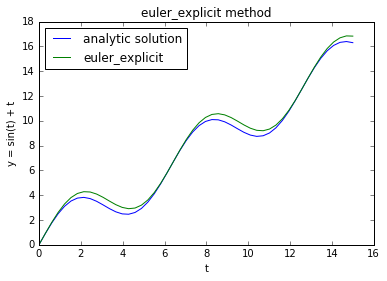

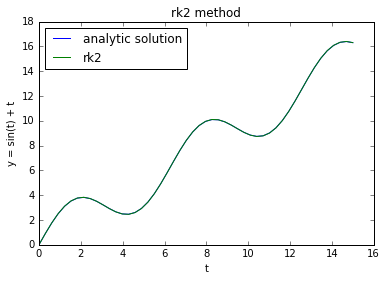

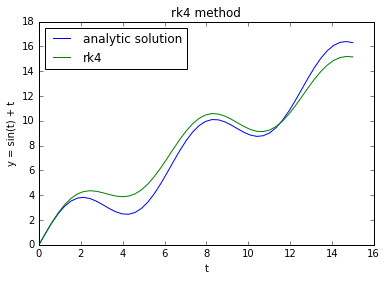

In [239]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

###########################################################################
### FOUR INTEGRATION METHODS: euler_explicit, euler_symplectic, rk2, rk4 ##
###########################################################################

def euler_explicit_step(func, y, t, dt):
    return y + dt * func(y, t)

def euler_explicit(func, y0, t, not_prob2=False):
    num_variables = len(y0)
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0  # Store initial values
    
    for i in range(0,len(t)-1):
        dt = t[i+1]-t[i]
        y[i+1,:] = euler_explicit_step(func, y[i,:], t[i], dt)
    print('EULER EXPLICIT INFO:')
    print('dt:', t[1]-t[0])
    print('Max height:', max(y[:,0]))
    if not_prob2:
        return y
    return y[:,0]

###########################################################################

def euler_symplectic_step(func, y, t, dt):
    return y + dt * func(y, t)

def euler_symplectic(func, y0, t):
    num_variables = len(y0)
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0[0]  # Store initial values
        
    print("y0: ", y0)
    for i in range(0,len(t)-1):
        dt = t[i+1]-t[i]
        # Build up so that, in general, the jth variable is updated 
        #   with the i+1 position of the (j-1)th variable.
        # Requires an extra function call for each variable
        # Currently only defined for 2-D.
        r1 = euler_symplectic_step(func, y[i  ,:], t[i], dt)
        y[i+1,0] = r1[0]
        y[i+1,1] = y[i,1]

        r2 = euler_symplectic_step(func, y[i+1,:], t[i], dt)
        y[i+1,1] = r2[1]
    print('EULER SYMPLECTIC INFO')
    print('dt:', t[1]-t[0])
    print('Max height:', max(y[:,0]))
    return y[:,0]

###########################################################################


def rk2_step(func, y, t, dt):
    k1 = dt * func(y, t)
    k2 = dt * func(y + k1/2, t + dt/2)
    y_new = y + k2
    return y_new

def rk2(func, y0, t):
    num_variables = len(y0)
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0
    for i in range(0, len(t)-1):
        dt = t[i+1] - t[i]
        y[i+1,:] = rk2_step(func, y[i,:], t[i], dt)
    return y[:,0]

###########################################################################

def rk4_step(func, y, t, dt):
    k1 = dt * func(y, t)
    k2 = dt * func(y + k1/2, t + dt/2)
    k3 = dt * func(y + k2/2, t + dt/2)
    k4 = dt * func(y + k3, t * dt)
    y_new = y + (1/6) * (k1 + 2*k2 +2*k3 + k4)
    return y_new

def rk4(func, y0, t):
    num_variables = len(y0)
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0
    for i in range(0, len(t)-1):
        dt = t[i+1] - t[i]
        y[i+1,:] = rk4_step(func, y[i,:], t[i], dt)
    return y[:,0]

###########################################################################
####################### TESTING ALL FOUR METHODS ##########################
###########################################################################

# Getting familiar with the functions I'll be using.
# Symplectic method is giving me trouble...

def analytic(y, t):
    return 2*np.sin(t) + t

def test_f(y, t):
    return 2*np.cos(t) + 1

def test_methods():
    T = np.linspace(0,15,50)
    y0 = [0]
    
    Y = analytic(y0, T)
    
    Y1 = euler_explicit(test_f, y0, T)
    #Y2 = euler_symplectic(test_f, y0, T)
    Y3 = rk2(test_f, y0, T)
    Y4 = rk4(test_f, y0, T)
    
    plt.plot(T, Y,  label='analytic solution')
    plt.plot(T, Y1, label='euler_explicit')
    plt.title('euler_explicit method')
    plt.xlabel('t')
    plt.ylabel('y = sin(t) + t')
    plt.legend(loc='best')
    plt.show()
    
    #plt.plot(T, Y,  label='analytic solution')
    #plt.plot(T, Y2, label='euler_symplectic')
    #plt.title('euler_symplectic method')
    #plt.xlabel('t')
    #plt.ylabel('y = sin(t) + t')
    #plt.legend(loc='best')
    #plt.show()
    
    plt.plot(T, Y,  label='analytic solution')
    plt.plot(T, Y3, label='rk2')
    plt.title('rk2 method')
    plt.xlabel('t')
    plt.ylabel('y = sin(t) + t')
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(T, Y,  label='analytic solution')
    plt.plot(T, Y4, label='rk4')
    plt.title('rk4 method')
    plt.xlabel('t')
    plt.ylabel('y = sin(t) + t')
    plt.legend(loc='best')
    plt.show()
    
test_methods()

In [212]:
def force_gravity(m=0.145, g=-9.8):
    return m*g

def force_drag(v, p=1.16, C_d=0.5, A=np.pi*0.0366**2):
    # We need this to avoid division by zero
    if v == 0:
        return 0
    
    # v/abs(v) will be +1 or -1 depending on the direction of v
    return (1/2*p*C_d*A * v**2) * v/abs(v)

def acceleration(v, m=0.145, g=-9.8, p=1.16, C_d=0.5, A=np.pi*0.0366**2):
    # a = F/m
    return (force_gravity(m, g) + force_drag(v, p, C_d, A)) / m

###########################################################################

# Part (a)

# dy/dt = v
# dv/dt = g - (1/2*m)*p*C_d*A * v**2 * abs(v)/v

# Part (b)
# rk2 and rk4 methods aren't cooperating...

def f1(y, t):
    g = -9.8
    y, v, = y[0], y[1]
    return np.array([v, g])

def f2(y, t):
    g = -9.8
    y, v = y[0], y[1]
    return np.array([v, acceleration(v)])

def no_drag(N):
    y0, v0 = 0, 50
    initial = [y0, v0]
    
    t_ground = 2*v0/9.8
    t = np.linspace(0, t_ground, N)
    
    r1 = euler_explicit(f1, initial, t)
    r2 = euler_symplectic(f1, initial, t)
    #r3 = rk2(f1, initial, t)
    #r4 = rk4(f1, initial, t)

    y1, v1 = r1[:,0], r1[:,1]
    y2, v2 = r2[:,0], r2[:,1]
    #y3, v3 = r3[:,0], r3[:,1]
    #y4, v4 = r4[:,0], r4[:,1]
    
    t_max = v0/9.8
    analytic_max_height = -4.9*t_max**2 + v0*t_max
    print('Analytic max height:', analytic_max_height)
    
    plt.plot(t, y1, label='euler_explicit')
    plt.plot(t, y2, label='euler_symplectic')
    #plt.plot(t, y3, label='rk2')
    #plt.plot(t, y4, label='rk4')
    plt.legend(loc='best')
    plt.title('No drag height vs. time')
    plt.xlabel('time (s)')
    plt.ylabel('height (m)')
    plt.show()
    
    plt.plot(t, v1, label='euler_explicit')
    plt.plot(t, v2, label='euler_symplectic')
    #plt.plot(t, y3, label='rk2')
    #plt.plot(t, y4, label='rk4')
    plt.legend(loc='best')
    plt.title('No drag velocity vs. time')
    plt.xlabel('time (s)')
    plt.ylabel('velocity (m/s)')
    plt.show()
    
def drag(N):
    y0, v0 = 0, 50
    initial = [y0, v0]
    
    t_ground = 2*v0/9.8
    t = np.linspace(0, t_ground, N)
    
    r1 = euler_explicit(f2, initial, t)
    r2 = euler_symplectic(f2, initial, t)
    r3 = rk2(f1, initial, t)
    #r4 = rk4(f1, initial, t)

    y1, v1 = r1[:,0], r1[:,1]
    y2, v2 = r2[:,0], r2[:,1]
    y3, v3 = r3[:,0], r3[:,1]
    #y4, v4 = r4[:,0], r4[:,1]
    
    t_max = v0/9.8
    analytic_max_height = -4.9*t_max**2 + v0*t_max
    print('Analytic max height:', analytic_max_height)
    
    plt.plot(t, y1, label='euler_explicit')
    plt.plot(t, y2, label='euler_symplectic')
    plt.plot(t, y3, label='rk2')
    #plt.plot(t, y4, label='rk4')
    plt.legend(loc='best')
    plt.title('Drag')
    plt.xlabel('time')
    plt.ylabel('height (m)')
    plt.show()
    
    plt.plot(t, v1, label='euler_explicit')
    plt.plot(t, v2, label='euler_symplectic')
    #plt.plot(t, y3, label='rk2')
    #plt.plot(t, y4, label='rk4')
    plt.legend(loc='best')
    plt.title('No drag')
    plt.xlabel('time (s)')
    plt.ylabel('velocity (m/s)')
    plt.show()

no_drag(500)
drag(500)





###########################################################################

# From humble beginnings...just my initial attempts at this problem
def net_force(v, m=0.145, g=-9.8, p=1.16, C_d=0.5, A=np.pi*0.0366**2):
    # Let the +y direction be positive (rising) and -y direction be negative (falling)
    
    # If v > 0, then the drag force is in the same direction as gravity. If v < 0, it's in the opposite direction.
    # When v = 0, the drag force disappears, so it doesn't matter if we tie that case in with v > 0 or v < 0.
    if v >= 0:
        k = 1
    else:
        k = -1
        
    force = (m*g) - k*(1/2*p*C_d*A * v**2)
    
    return force

#net_force(0)
    

dt: 0.0204490613881
Max height: 128.062759194
y0:  [0, 50]


IndexError: too many indices for array

In [213]:
C_d = 0
rho = 1.16
m = 0.145
r = 0.0366
g = 9.8
A = np.pi*0.0366**2

def accerlation(v,C_d=0.5, p=1.16, m=0.145, r=0.0366, g=-9.8, A=np.pi*0.0366**2):
    return (force_gravity(m, g) + force_drag(v, p, A, C_d))/m

def force_gravity(m=0.145,g=-9.8):
    return m*g 

def force_drag(v, p=1.16, A=np.pi*0.0366**2, C_d=0.5):
    #to avoid division by 0
    if v==0:
        return 0
    else:
        return -0.5 * p * v**2 * C_d * A / np.abs(v)

def f1(y, t):
    g = -9.8
    y, v = y[0], y[1]
    return np.array([v, g])
    
def f2(y, t):
    g = -9.8
    y, v = y[0], y[1]
    return np.array([v, accelration(v)])



EULER EXPLICIT INFO:
dt: 0.0204490613881
Max height: 128.062759194
EULER EXPLICIT INFO:
dt: 0.0204490613881
Max height: 128.062759194
Analytic max height: 127.55102040816327


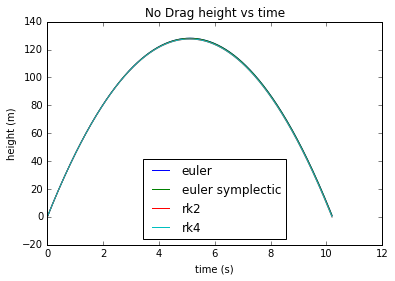

EULER EXPLICIT INFO:
dt: 0.0204490613881
Max height: 68.2742887721
EULER EXPLICIT INFO:
dt: 0.0204490613881
Max height: 68.2742887721


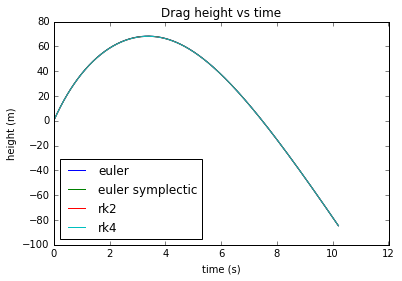

NEXT PLOT IS FOR V0 = 500


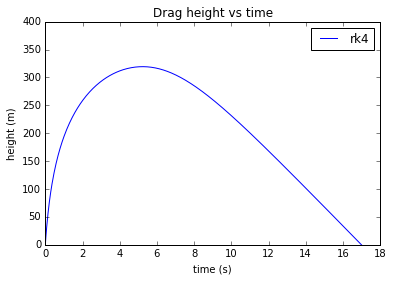

In [232]:
def no_drag_plot(N):
    y0 = 0
    v0 = 50
    initial = [y0, v0]
    t_ground = 2*v0/9.8
    t = np.linspace(0, t_ground, N)

    y1 = euler_explicit(f1, initial, t)
    plt.plot(t, y1, label='euler')

    y2 = euler_explicit(f1, initial, t)
    plt.plot(t, y2, label='euler symplectic')

    y3 = rk2(f1, initial, t)
    plt.plot(t, y3, label='rk2')

    y4 = rk4(f1, initial, t)
    plt.plot(t, y4, label='rk4')
    
    t_max = v0/9.8
    analytic_max_height = -4.9*t_max**2 + v0*t_max
    print('Analytic max height:', analytic_max_height)
    
    plt.xlabel('time (s)')
    plt.ylabel('height (m)')
    plt.legend(loc='best')
    plt.title('No Drag height vs time')
    plt.show()
    
def drag_plot(N, v0, last_part=False): 
    y0 = 0
    v0 = v0
    initial = [y0, v0]
    t_ground = 2*v0/9.8
    
    if last_part:
        t_ground = 18
    
    t = np.linspace(0, t_ground, N)
    
    
    if not last_part:
        y1 = euler_explicit(f2, initial, t)
        plt.plot(t, y1, label='euler')

        y2 = euler_explicit(f2, initial, t)
        plt.plot(t, y2, label='euler symplectic')

        y3 = rk2(f2, initial, t)
        plt.plot(t, y3, label='rk2')

    y4 = rk4(f2, initial, t)
    plt.plot(t, y4, label='rk4')

    plt.xlabel('time (s)')
    plt.ylabel('height (m)')
    plt.legend(loc='best')
    plt.title('Drag height vs time')
    
    if last_part:
        plt.ylim((0,400))
        
    plt.show()

no_drag_plot(500)
drag_plot(500, 50)
print('NEXT PLOT IS FOR V0 = 500')
drag_plot(500, 500, last_part=True)

N = 500 is actually good enough for ~1% error

The max height calculated with Euler's method is slightly greater than the actual max height. This is expected though, since Euler's method uses linear approximations. Since the function is concave down, the peak will be overestimated.

The motion depicted in the graph is a concave down parabola. The ball
is constant accelerating downwards. With drag, the ball slows down much more quickly on the way up, and then accelerates more slowly on the way down until it reaches a terminal velocity.

The magnitude of the ball's terminal velocity is about -33 m/s. You can see this by simply looking at the graph when it begins to straighten out. There's a point around (10, 250) and another point around (16, 50). The slope between those lines is -33.33 m/s. You could also get this from the velocity data which is solved for in every method we have implemented.

### Problem 3: Error Dependence on Time Step Size
In this problem, you will write a function to evaluate the dependence of the integration error on the step size in the ODE integration methods that we have discussed.

Begin with the harmonic oscillator problem with $m=k=1$, i.e.
$$
\frac{d^2x}{dt^2} = -x
$$
With initial conditions $x(0)=1.0$ and $v(0)=0$.

Make three plots, each with one "curve" for each integration method. All plots should have the step size `dt` on the horizontal axis.
 * The first plot should show the maximum magnitude of the error in $x$ on the vertical axis,  
 * the second plot should shown the maximum magnitude of the error in $v$, and 
 * the third should show the maximum magnitude of the error in the normalized energy, (the magnitude of the error in the normalized energy is $\left| x^2+v^2 - 1 \right|$).

In each case, the maximum error should be the magnitude of the largest difference from the analytical result for each quantity over the whole integration time. The number of steps needed to reach that time will depend on `dt`. Be sure to include plot titles and axis labels on each plot. Plot the results of all methods on the same plots, and use different colors for different methods.

Decide whether it is most appropriate to use linear, semi-log, or log-log plots, and set the axis scales correctly. Describe the results, and try to be as quantitative as possible about the dependence and relative accuracy of the methods. For nice plots, try a maximum `dt=1.0`, a minimum `dt=0.01`, with at least 50 steps in `dt` equally spaced on a log scale. Integrate until you reach a maximum ${\rm time}=50$ s at each `dt`. This calculation may take a while.

------

THIS GRAPH IS FOR ERROR IN X


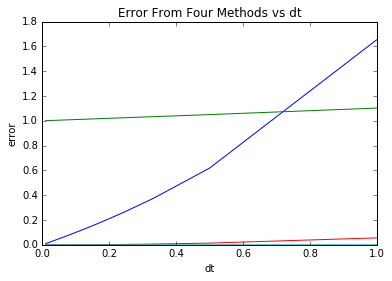

In [288]:
def euler_explicit_step(func, y, t, dt):
    return y + dt * func(y, t)

# This is the same as the function at the beginning of the homework, except
# this one doesn't have all the special stuff I added to cater to problem 2
def euler_explicit(func, y0, t):
    num_variables = len(y0)
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0  # Store initial values
    
    for i in range(0,len(t)-1):
        dt = t[i+1]-t[i]
        y[i+1,:] = euler_explicit_step(func, y[i,:], t[i], dt)
        
    return y

def euler_symplectic(func, y0, t):
    num_variables = len(y0)
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0[0]  # Store initial values
        
    for i in range(0,len(t)-1):
        dt = t[i+1]-t[i]
        # Build up so that, in general, the jth variable is updated 
        #   with the i+1 position of the (j-1)th variable.
        # Requires an extra function call for each variable
        # Currently only defined for 2-D.
        r1 = euler_symplectic_step(func, y[i  ,:], t[i], dt)
        y[i+1,0] = r1[0]
        y[i+1,1] = y[i,1]

        r2 = euler_symplectic_step(func, y[i+1,:], t[i], dt)
        y[i+1,1] = r2[1]
    return y

def rk2(func, y0, t):
    num_variables = len(y0)
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0
    for i in range(0, len(t)-1):
        dt = t[i+1] - t[i]
        y[i+1,:] = rk2_step(func, y[i,:], t[i], dt)
    return y

def rk4(func, y0, t):
    num_variables = len(y0)
    y = np.zeros((len(t), num_variables))
    y[0,:] = y0
    for i in range(0, len(t)-1):
        dt = t[i+1] - t[i]
        y[i+1,:] = rk4_step(func, y[i,:], t[i], dt)
    return y

def f3_analytic(t):
    return np.cos(t)

def f3(y, t, k=1):
    x, v = y[0], y[1]
    return np.array([v, -k*x])

def errors(N, X, V, E):
    x0, v0, = 1, 0
    T = np.linspace(0, 10, N)
    initial = [x0, v0]
    
    r1 = euler_explicit(f3, initial, T)
    r2 = euler_symplectic(f3, initial, T)
    r3 = rk2(f3, initial, T)
    r4 = rk4(f3, initial, T)
    
    x1, v1 = r1[:,0], r1[:,1]
    x2, v2 = r2[:,0], r2[:,1]
    x3, v3 = r3[:,0], r3[:,1]
    x4, v4 = r4[:,0], r4[:,1]
    
    x1_err = max(abs(x1-f3_analytic(T)))
    x2_err = max(abs(x2-f3_analytic(T)))
    x3_err = max(abs(x3-f3_analytic(T)))
    x4_err = max(abs(x4-f3_analytic(T)))
    
    v1_err = max(abs(v1-f3_analytic(T)))
    v2_err = max(abs(v2-f3_analytic(T)))
    v3_err = max(abs(v3-f3_analytic(T)))
    v4_err = max(abs(v4-f3_analytic(T)))
    
    if X:
        return x1_err, x2_err, x3_err, x4_err
    elif V:
        return v1_err, v2_err, v3_err, v4_err
    elif E:
        return (x1_err, x2_err, x3_err, x4_err, 
                v1_err, v2_err, v3_err, v4_err)

def plot_error(X, V, E):
    N = [ ]
    E1 = [ ]
    E2 = [ ]
    E3 = [ ]
    E4 = [ ]
    for n in range(50, 5000+1, 50):
        e1, e2, e3, e4 = errors(n, X, V, E)
        N.append(n)
        E1.append(e1)
        E2.append(e2)
        E3.append(e3)
        E4.append(e4)
    dt = 50*np.ones(len(N))
    dt = dt/N
    plt.plot(dt, E1, label='euler explicit')
    plt.plot(dt, E2, label='euler symplectic')
    plt.plot(dt, E3, label='rk2')
    plt.plot(dt, E4, label='rk4')
    plt.title('Error From Four Methods vs dt')
    plt.xlabel('dt')
    plt.ylabel('error')

print('THIS GRAPH IS FOR ERROR IN X')
plot_error(X=True, V=False, E=False)

THIS GRAPH IS FOR ERROR IN V


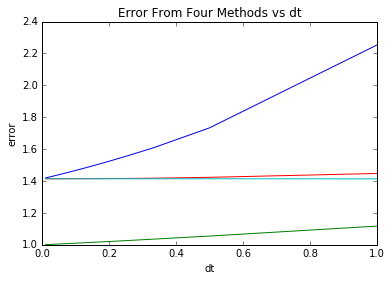

In [289]:
print('THIS GRAPH IS FOR ERROR IN V')
plot_error(X=False, V=True, E=False)

THIS GRAPH IS FOR ERROR IN ENERGY


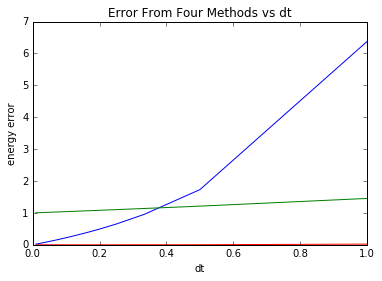

In [296]:
def energy_errors(N):
    x0, v0, = 1, 0
    T = np.linspace(0, 10, N)
    initial = [x0, v0]
    
    r1 = euler_explicit(f3, initial, T)
    r2 = euler_symplectic(f3, initial, T)
    r3 = rk2(f3, initial, T)
    r4 = rk4(f3, initial, T)
    
    x1, v1 = r1[:,0], r1[:,1]
    x2, v2 = r2[:,0], r2[:,1]
    x3, v3 = r3[:,0], r3[:,1]
    x4, v4 = r4[:,0], r4[:,1]
    
    e1_err = max(x1**2 + v1**2 -1)
    e2_err = max(x2**2 + v2**2 -1)
    e3_err = max(x3**2 + v3**2 -1)
    e4_err = max(x4**2 + v4**2 -1)
    
    return e1_err, e2_err, e3_err, e4_err


def plot_energy():
    N = [ ]
    E1 = [ ]
    E2 = [ ]
    E3 = [ ]
    E4 = [ ]
    for n in range(50, 5000+1, 50):
        e1, e2, e3, e4 = energy_errors(n)
        N.append(n)
        E1.append(e1)
        E2.append(e2)
        E3.append(e3)
        E4.append(e4)
    dt = 50*np.ones(len(N))
    dt = dt/N
    plt.plot(dt, E1, label='euler explicit')
    plt.plot(dt, E2, label='euler symplectic')
    plt.plot(dt, E3, label='rk2')
    plt.plot(dt, E4, label='rk4')
    plt.title('Error From Four Methods vs dt')
    plt.xlabel('dt')
    plt.ylabel('energy error')
   
print('THIS GRAPH IS FOR ERROR IN ENERGY')
plot_energy()

0.005


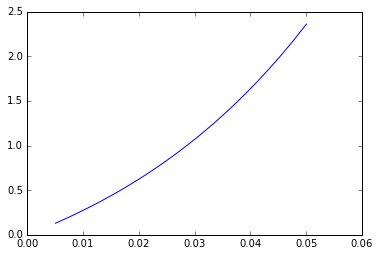

In [234]:
def g(x, v, t):
    return np.array([v, -x])

def euler_explicit_2d_step(f, x, v, t, dt):
    return np.array([x, v]) + dt * f(x, v, t)

def euler_explicit_2d(f, x0, v0, t):

    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0   # Initial value
    v[0] = v0   # Initial value
    
    for i in range(0,len(t)-1):
        dt = t[i+1]-t[i]
        x[i+1], v[i+1] = euler_explicit_2d_step(f, x[i], v[i], t[i], dt)

    return x, v

N = 1000
#t = np.linspace(0, 100, N)

x0 = 1
v0 = 0




def error_plot():
    dt = [ ]
    x1 = [ ]
    v1 = [ ]
    N = 1000
    
    while N < 10000:
        T = np.linspace(0, 50, N)
        dt_step = T[1] - T[0]
        
        x, v = euler_explicit_2d(g, x0, v0, T)
        x_error = max(abs(x - np.cos(T)))
        v_error = max(abs(v - (-np.sin(T))))
        
        dt.append(dt_step)
        x1.append(x_error)
        v1.append(v_error)
        
        N *= 1.05
        
    x1 = np.array(x1)
    v1 = np.array(v1)
    
    plt.plot(dt, x1)
    
error_plot()
blah = np.linspace(0, 50, 10001)
print(blah[1]-blah[0])

### Problem 4: Anharmonic Oscillator
In this problem, you will write a function which uses the four integration methods demonstrated in the lecture demonstration to solve the anharmonic oscillator problem with $m=k=1$, i.e.

$$
\frac{d^2x}{dt^2} = -x^m
$$

where $m$ is an odd integer. The initial conditions are $x(0)=1.0$ and $v(0)=0$.

a. What is the formula for the normalized energy of the anharmonic oscillator for an arbitrary choice of $m\geq 1$ and initial conditions $x(0)=x_0$ and $v(0)=0$? The normalized energy should always remain $1$ if energy is perfectly conserved.

b. Write a function which integrates the anharmonic oscillator equation and plots the results:
  1. Implement the four integration methods demonstrated in the lecture, with the method selectable in the graphical user interface.  
  2. For more speed, only show `1` out of every `N_update` points on your plots, since plotting is likely the slowest part of the calculation. Even calculations with $10,000$ steps should be reasonably fast if you choose `N_update` $=100$ or more.  
  3. On the first plot, show the $x$ and $v$ results over time. On the second plot, show the phase space trajectory. On the third plot, show the error in the normalized energy, which you found in part (a). Be sure to include plot titles and axis labels on each plot, and use different colors for plots with multiple data sets.  

Note that we do not have an analytical solution to the general case, but check that your code is correct by verifying that the harmonic case, $m=1$, gives the expected results (describe what you expect and what you see).

c. Make these three plots for all four integration methods (`Euler`, `Euler_symplectic`, `RK2`, and `RK4`) for the mildly anharmonic case: $m=3$, $dt=0.01$, total time $t=50.0$, and `N_update` $=10$ (each method should have three plots, don't combine the different methods on the same plot). Compare the results and the energy errors for all integration methods. Be sure to include plot titles and axis labels on each plot, and use different colors for plots with multiple data sets.

d. Make these three plots for all four integration methods for an extremely anharmonic case: $m=101$, $dt=0.01$, total time $t=100.0$, and `N_update` $=10$ (note that the Euler method may not be stable enough to make it through the whole time interval).  Compare the results and the energy errors for all integration methods. Based on the results, what is the physical behavior of this highly anharmonic oscillator (i.e. what other physical system does it behave like)?

e. Compare the changes in the oscillator behavior as you change the initial amplitude, $x_0$.
 * How does it depend on the choice of $m$?
 * What is special about $m=1$?
 * Why?

------

The normalized energy is the integral...so, 
E = k * x^(m+1)/(m+1)

The solution for m = 1 should look like x = -cos(t), which is the same analytic solution from the previous problem.

This problem has been confusing me all week...

In [ ]:
def f4(y, t, k=1):
    x, v = y[0], y[1]
    return np.array([v, -k*x])


###########################################################################

def rk4_step(func, y, t, dt):
    k1 = dt * func(y, t)
    k2 = dt * func(y + k1/2, t + dt/2)
    k3 = dt * func(y + k2/2, t + dt/2)
    k4 = dt * func(y + k3, t + dt)
    result = (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    y_new = y + result
    return y_new

def rk4(func, y0, t)
    num_variables = len(y0)
    y = np.zeroes((len(t), num_variables))
    y[0,:] = y0
    
    for i in range(0, len(t)-1):
        dt = t[i+1] - t[i]
        y[i+1,:] = y[i,:] + rk4_step(func, y[i,:], t[i], dt)
        
    return y